In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path_gc = r'/content/drive/MyDrive/Colab Notebooks/ESTAGIO LGHM/GCNetwork.txt'
path_gnomad = r"/content/drive/MyDrive/Colab Notebooks/ESTAGIO LGHM/gnomad.v2.1.1.all_lofs.txt.bgz"

In [4]:
gnomad = pd.read_csv(path_gnomad, compression='gzip', on_bad_lines='skip', delim_whitespace=True, low_memory=False)
gc = pd.read_csv(path_gc, skiprows = [i for i in range (1,75)], delim_whitespace=True)
gnomad.rename(columns = {'pos':'Variant'}, inplace = True)

- CFTR
- Uma variante pode afetar mais de um transcritos, registrar quantos são afetados por cada consequencia
- registrar quantas variantes por cada consequencia

In [5]:
gnomad

,chrom,Variant,ref,alt,most_severe_consequence,gene_ids,gene_symbols,transcript_ids
0,1,69456,C,CCTACA,frameshift_variant,ENSG00000186092,OR4F5,ENST00000335137
1,1,69469,ACAATT,A,frameshift_variant,ENSG00000186092,OR4F5,ENST00000335137
2,1,69516,G,A,stop_gained,ENSG00000186092,OR4F5,ENST00000335137
3,1,69620,TA,T,frameshift_variant,ENSG00000186092,OR4F5,ENST00000335137
4,1,69702,TG,T,frameshift_variant,ENSG00000186092,OR4F5,ENST00000335137
...,...,...,...,...,...,...,...,...
443764,Y,22921918,C,G,stop_gained,ENSG00000157828,RPS4Y2,ENST00000288666
443765,Y,22930689,A,G,splice_acceptor_variant,ENSG00000157828,RPS4Y2,ENST00000288666
443766,Y,22930763,C,T,stop_gained,ENSG00000157828,RPS4Y2,ENST00000288666
443767,Y,25375763,CA,C,frameshift_variant,ENSG00000205944,DAZ2,"ENST00000382440,ENST00000382433,ENST0000038229..."


In [48]:
##variantes e transcritos sem distinção de consequencia.
#substituindo as consequencias por numeros
all = gnomad[(gnomad['gene_symbols'] == 'CFTR')].drop(['chrom', 'ref', 'alt', 'gene_ids',  'gene_symbols'], axis=1)
all = all.replace(['frameshift_variant','stop_gained','splice_donor_variant','splice_acceptor_variant'],['1','2','3','4']).values.T

In [7]:
#140 variantes unicas para o gene CFTR
unique_variantes = gnomad.loc[(gnomad['gene_symbols']=='CFTR'),'Variant'].unique()
len_variantes = len(unique_variantes)

In [49]:
for i in range(145):
  all[2][i] = all[2][i].split(',') #split dos transcritos que estavam juntos em uma única string

variant_id = [str(variant) for variant in all[0]] #tornando as variantes uma string para adicionar como key no dicionario

In [50]:
ref = np.array(['ENST00000003084', 'ENST00000426809', 'ENST00000446805',
       'ENST00000454343', 'ENST00000468795', 'ENST00000600166'])
all[2] = [[ref[k] if ref[k] in all[2][i] else 0 for k in range(len(ref))]for i in range(len(all[2]))]

In [9]:
a = [np.array(i) for i in all[2]]
transc = np.concatenate((a))
unique_transc = np.unique(transc) #6 transcritos unicos que se repetem 456x entre as variantes do gene CFTR
len_uniq_transc = len(unique_transc)

In [ ]:
conseq_transc = [] #lista para juntar consequencias e transcritos
for i in range(145):
  for j in range(len(all[2][i])): #range de acordo com a quantidade de transcritos no vetor
    lista = (all[1][i],all[2][i][j])
    conseq_transc.append(lista)

len_transc = [len(all[2][i]) for i in range(len(all[2]))] #armazenando a quantidade de transcritos que aparecem por variante
print(len_transc)

var_cons_transc = [] #lista para armazenar os dicionarios
#precisa ser uma lista porque as variantes irão se repetir para diferentes transcritos
#dicionários não aceitam valores repetidos
cont = 0 #contador para atualizar o vetor conseq_transc
for i in range(len(all[2])):
  dicts = {variant_id[i]: conseq_transc[cont:len_transc[i]+cont]} #key: variantes, value: (conseq, transcritos)
  cont = cont + len_transc[i]
  var_cons_transc.append(dicts)


In [51]:
##outra solução para criar a mesma lista
conseq_transc = [[(all[1][i],all[2][i][j]) for j in range(len(all[2][i]))] for i in range(len(all[2]))] #compreensão de lista
var_cons_transc = [(variant_id[i], conseq_transc[i]) for i in range(len(all[2]))]

In [59]:
var_cons_transc

[('117120152',
  [('2', 'ENST00000003084'),
   ('2', 'ENST00000426809'),
   ('2', 0),
   ('2', 'ENST00000454343'),
   ('2', 0),
   ('2', 0)]),
 ('117120190',
  [('1', 'ENST00000003084'),
   ('1', 'ENST00000426809'),
   ('1', 0),
   ('1', 'ENST00000454343'),
   ('1', 0),
   ('1', 0)]),
 ('117120202',
  [('3', 'ENST00000003084'),
   ('3', 'ENST00000426809'),
   ('3', 0),
   ('3', 'ENST00000454343'),
   ('3', 0),
   ('3', 0)]),
 ('117144332',
  [('2', 'ENST00000003084'),
   ('2', 'ENST00000426809'),
   ('2', 0),
   ('2', 'ENST00000454343'),
   ('2', 0),
   ('2', 0)]),
 ('117144404',
  [('1', 'ENST00000003084'),
   ('1', 'ENST00000426809'),
   ('1', 0),
   ('1', 'ENST00000454343'),
   ('1', 0),
   ('1', 0)]),
 ('117149101',
  [('2', 'ENST00000003084'),
   ('2', 'ENST00000426809'),
   ('2', 0),
   ('2', 'ENST00000454343'),
   ('2', 0),
   ('2', 0)]),
 ('117149146',
  [('2', 'ENST00000003084'),
   ('2', 'ENST00000426809'),
   ('2', 0),
   ('2', 'ENST00000454343'),
   ('2', 0),
   ('2', 0)]),

In [52]:
lista = [[] for i in range(6)] #armazenando os valores das consequencias que relacionam transcritos (linha) e variantes (coluna)
#para criar uma matriz (6,140)

for j in range(len(lista)):
  for i in range(len(var_cons_transc)):
    for value in var_cons_transc[i][1]:
      if unique_transc[j] in value:
        lista[j].append(float(value[0]))

In [55]:
for i in range(len(lista)):
  print(np.shape(lista[i]))

(145,)
(141,)
(5,)
(142,)
(16,)
(7,)


In [46]:
for i in range(len(lista)):
  lista[i] = np.pad(lista[i],(0,(len(lista[0])-len(lista[i])))) #padding dos arrays dentro da lista para completar 145 em todos

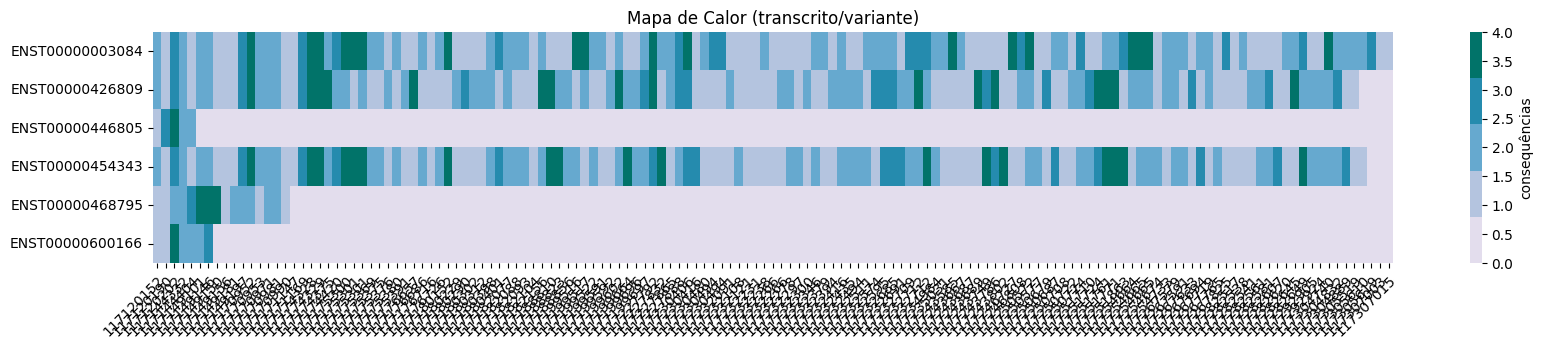

In [47]:
fig, ax = plt.subplots(figsize=(20, 3))
cmap = sns.color_palette("PuBuGn", 5)
sns.heatmap(lista, vmin=0, vmax = 4, cmap = cmap, cbar_kws={'label': 'consequências'}, xticklabels = variant_id, yticklabels = unique_transc)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
ax.set_title("Mapa de Calor (transcrito/variante)")
plt.show()

In [16]:
frame_transc = gnomad[(gnomad['gene_symbols'] == 'CFTR') & (gnomad['most_severe_consequence'] == 'frameshift_variant')].drop(['chrom', 'ref', 'alt', 'gene_ids',  'gene_symbols'], axis=1).values.T
stop_transc = gnomad[(gnomad['gene_symbols'] == 'CFTR') & (gnomad['most_severe_consequence'] == 'stop_gained')].drop(['chrom', 'ref', 'alt', 'gene_ids',  'gene_symbols'], axis=1).values.T
splice_transc = gnomad[(gnomad['gene_symbols'] == 'CFTR') & (gnomad['most_severe_consequence'] == 'splice_acceptor_variant')].drop(['chrom', 'ref', 'alt', 'gene_ids',  'gene_symbols'], axis=1).values.T
donor_transc = gnomad[(gnomad['gene_symbols'] == 'CFTR') & (gnomad['most_severe_consequence'] == 'splice_donor_variant')].drop(['chrom', 'ref', 'alt', 'gene_ids',  'gene_symbols'], axis=1).values.T

In [17]:
#padding das variantes para poder criar o dataframe
new_v_sg = np.pad(stop_transc[0],(0, 6))
new_v_splice = np.pad(splice_transc[0],(0,40))
new_v_donor = np.pad(donor_transc[0],(0,41))

In [18]:
##criando DataFrame das variantes por conseq
data = np.array([frame_transc[0], new_v_sg, new_v_splice, new_v_donor])
column_name = ('frameshift variant', 'stop gained variant',  'splice acceptor variant', 'splice donor variant')
tabela = pd.DataFrame(data.T, columns = column_name)
tabela = tabela.replace(0,' ') #substituindo os zeros por vazio

l = [len(frame_transc[0]), len(stop_transc[0]), len(splice_transc[0]), len(donor_transc[0])]

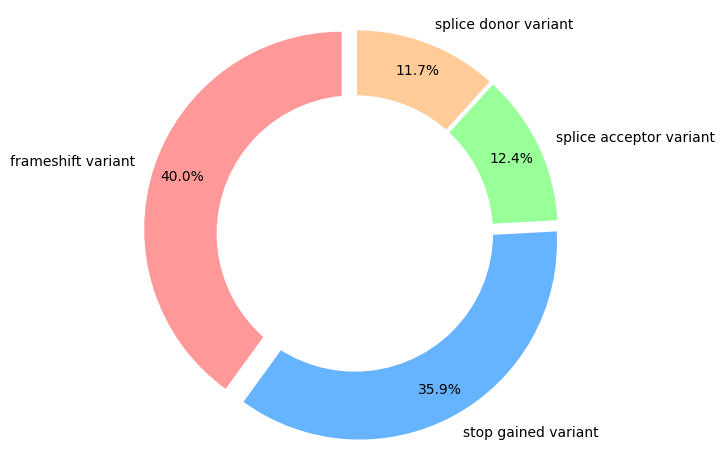

In [19]:
##gráfico de pizza para visualizar as quantidades (em porcentagem) das variantes por consequência
labels = column_name
sizes = l
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

#explsion
explode = (0.07,0.05,0.03,0.03)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.tight_layout()
plt.show()

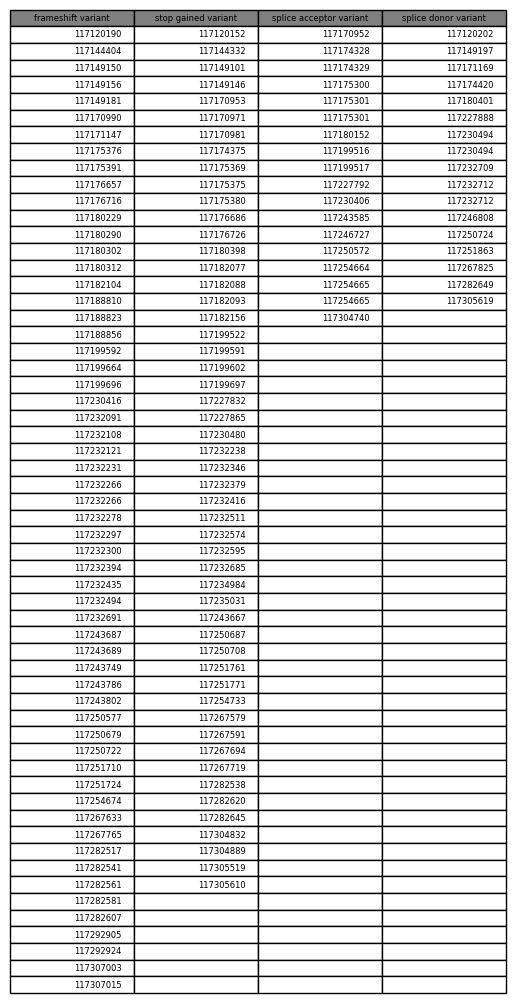

In [20]:
##tabela de variantes por consequência
fig, ax =plt.subplots(1,1)
ax.table(cellText=tabela.values,
        colLabels=tabela.columns,
        colColours =["gray"] * 4,
        loc="center")
ax.axis("off")
plt.savefig('variantes_por_conseq.pdf')
plt.show()